In [119]:
import re
import pandas as pd
from datetime import datetime

In [120]:
f=open('WhatsApp Chat with RCA (Rajshahi  City Association) Alumnie.txt','r',encoding='utf-8')

In [121]:
data=f.read()

In [122]:
print(data)

8/19/24, 11:42 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/17/24, 11:14 PM - ~ Nafis Al Imran created group "RCA(Rajshahi  City Association) Allumnie "
8/19/24, 11:42 PM - You joined using this group's invite link
8/19/24, 11:42 PM - Yusuf joined using this group's invite link
8/19/24, 11:42 PM - +880 1521-751439 joined using this group's invite link
8/19/24, 11:42 PM - +880 1521-368873 joined using this group's invite link
8/19/24, 11:42 PM - +880 1912-665577 joined using this group's invite link
8/19/24, 11:43 PM - Tumon joined using this group's invite link
8/19/24, 11:43 PM - +880 1314-429711 joined using this group's invite link
8/19/24, 11:43 PM - +880 1521-118452 joined using this group's invite link
8/19/24, 11:43 PM - +880 1780-947585 joined using this group's invite link
8/19/24, 11:43 PM - Anchaal joined using this group's invite link
8/19/24, 11:43 PM - +880 1766-202266 jo

In [123]:
print(type(data))

<class 'str'>


In [124]:
 pattern = r'(\d{1,2}/\d{1,2}/\d{2,4},\s(0?[1-9]|1[0-2]):([0-5]\d)\s(AM|PM))\s-\s(.*)'

# Find all matches in the data
matches = re.findall(pattern, data)

# Function to convert 12-hour format to 24-hour format
def convert_to_24_hour(hour, minute, am_pm):
    time_str = f"{hour}:{minute} {am_pm}"
    time_obj = datetime.strptime(time_str, '%I:%M %p')
    return time_obj.strftime('%H:%M')

# Extract date-time and messages
dates = []
messages = []

for match in matches:
    date_part = match[0]
    hour = match[1]
    minute = match[2]
    am_pm = match[3]
    message_part = match[4]
    
    # Convert to 24-hour format
    time_24 = convert_to_24_hour(hour, minute, am_pm)
    date_time = f"{date_part.split(',')[0]} {time_24} -"
    
    dates.append(date_time)
    messages.append(message_part.strip())


In [125]:
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.', '~\u202fNafis Al Imran created group "RCA(Rajshahi  City Association) Allumnie "', "You joined using this group's invite link", "Yusuf joined using this group's invite link", "+880 1521-751439 joined using this group's invite link", "+880 1521-368873 joined using this group's invite link", "+880 1912-665577 joined using this group's invite link", "Tumon joined using this group's invite link", "+880 1314-429711 joined using this group's invite link", "+880 1521-118452 joined using this group's invite link", "+880 1780-947585 joined using this group's invite link", "Anchaal joined using this group's invite link", "+880 1766-202266 joined using this group's invite link", "+880 1571-334545 joined using this group's invite link", "+880 1797-280751 joined using this group's invite link", "+880 1716-155607 joined using this group's invite link", "+880

In [126]:
len(messages)

588

In [127]:
print(dates)

['8/19/24 23:42 -', '8/17/24 23:14 -', '8/19/24 23:42 -', '8/19/24 23:42 -', '8/19/24 23:42 -', '8/19/24 23:42 -', '8/19/24 23:42 -', '8/19/24 23:43 -', '8/19/24 23:43 -', '8/19/24 23:43 -', '8/19/24 23:43 -', '8/19/24 23:43 -', '8/19/24 23:43 -', '8/19/24 23:44 -', '8/19/24 23:44 -', '8/19/24 23:44 -', '8/19/24 23:45 -', '8/19/24 23:45 -', '8/19/24 23:45 -', '8/19/24 23:45 -', '8/19/24 23:45 -', '8/19/24 23:45 -', '8/19/24 23:46 -', '8/19/24 23:46 -', '8/19/24 23:46 -', '8/19/24 23:46 -', '8/19/24 23:46 -', '8/19/24 23:46 -', '8/19/24 23:47 -', '8/19/24 23:47 -', '8/19/24 23:47 -', '8/19/24 23:47 -', '8/19/24 23:47 -', '8/19/24 23:48 -', '8/19/24 23:48 -', '8/19/24 23:48 -', '8/19/24 23:49 -', '8/19/24 23:49 -', '8/19/24 23:49 -', '8/19/24 23:50 -', '8/19/24 23:52 -', '8/19/24 23:53 -', '8/19/24 23:54 -', '8/19/24 23:54 -', '8/19/24 23:54 -', '8/19/24 23:54 -', '8/19/24 23:55 -', '8/19/24 23:55 -', '8/19/24 23:56 -', '8/19/24 23:57 -', '8/19/24 23:57 -', '8/19/24 23:57 -', '8/19/24 23

In [128]:
len(dates)


588

In [129]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
df['message-date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y %H:%M -')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date,message-date
0,Messages and calls are end-to-end encrypted. N...,8/19/24 23:42 -,2024-08-19 23:42:00
1,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",8/17/24 23:14 -,2024-08-17 23:14:00
2,You joined using this group's invite link,8/19/24 23:42 -,2024-08-19 23:42:00
3,Yusuf joined using this group's invite link,8/19/24 23:42 -,2024-08-19 23:42:00
4,+880 1521-751439 joined using this group's inv...,8/19/24 23:42 -,2024-08-19 23:42:00


In [130]:
df.shape

(588, 3)

In [131]:
#Separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,message-date,user,message
0,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,8/17/24 23:14 -,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ..."
2,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,You joined using this group's invite link
3,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link
4,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...


In [132]:

df['year']=df['message-date'].dt.year

In [133]:
df.head()

,date,message-date,user,message,year
0,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,8/17/24 23:14 -,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024
2,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024
3,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024
4,8/19/24 23:42 -,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024


In [134]:
df=df.drop('date',axis=1)

In [135]:
df.head()

,message-date,user,message,year
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024


In [136]:
df.rename(columns={'message-date': 'date'}, inplace=True)

In [137]:
df.head()

,date,user,message,year
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024


In [138]:
df['month']=df['date'].dt.month_name()

In [139]:
df.head()

,date,user,message,year,month
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August


In [140]:
df['day']=df['date'].dt.day

In [141]:
df.head()

,date,user,message,year,month,day
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,19
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August,17
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August,19
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August,19
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August,19


In [142]:
df['hour']=df['date'].dt.hour

In [143]:
df['minute']=df['date'].dt.minute

In [144]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,19,23,42
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August,17,23,14
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August,19,23,42
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August,19,23,42
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August,19,23,42


In [145]:
df[df['user']=='Siham'].shape

(1, 8)

In [146]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [147]:
print(words)

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.', '~', 'Nafis', 'Al', 'Imran', 'created', 'group', '"RCA(Rajshahi', 'City', 'Association)', 'Allumnie', '"', 'You', 'joined', 'using', 'this', "group's", 'invite', 'link', 'Yusuf', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1521-751439', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1521-368873', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1912-665577', 'joined', 'using', 'this', "group's", 'invite', 'link', 'Tumon', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1314-429711', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1521-118452', 'joined', 'using', 'this', "group's", 'invite', 'link', '+880', '1780-947585', 'joined', 'using', 'this', "group's", 'invite', 'link', 'Anchaal',

In [148]:
from urlextract import URLExtract
extractor=URLExtract()

y=[]
for message in df['message']:
    y.extend(extractor.find_urls(message))
len(y)

5

In [149]:
!pip install urlextract

In [150]:
from urlextract import URLExtract
extractor=URLExtract()

links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))
print(len(links))
links

5


['https://assunnahfoundation.org/donate/flood?sfnsn=wa',
 'https://www.facebook.com/profile.php?id=100089764775932&mibextid=ZbWKwL',
 'https://www.facebook.com/share/p/KjKz8oQ55YRsXCuJ/?mibextid=WC7FNe',
 'https://www.facebook.com/share/r/ffiDFUNyb9wFH2rd/?mibextid=UalRPS',
 'https://www.facebook.com/share/p/MqWV5tnLWrPpTnd9/?mibextid=oFDknk']

In [151]:
df

,date,user,message,year,month,day,hour,minute
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,19,23,42
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August,17,23,14
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August,19,23,42
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August,19,23,42
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August,19,23,42
...,...,...,...,...,...,...,...,...
583,2024-09-15 21:59:00,+880 1701-009661,ভাই আপনি রাগ কইরেন না। আমি সপ্তাহে দুইবার করে ...,2024,September,15,21,59
584,2024-09-15 22:04:00,+880 1687-192402,ক্যাম্পাসে থাকতে মেলাজনের পিছনেই মেলা কিছু করছ...,2024,September,15,22,4
585,2024-09-15 22:08:00,+880 1701-009661,না ভাই। তেমন কিছু না। আপনি অত বড় নেতা ছিলেন না...,2024,September,15,22,8
586,2024-09-18 13:23:00,+880 1322-379174,<Media omitted>,2024,September,18,13,23


In [152]:
x=df['user'].value_counts().head()

In [153]:
import matplotlib.pyplot as plt

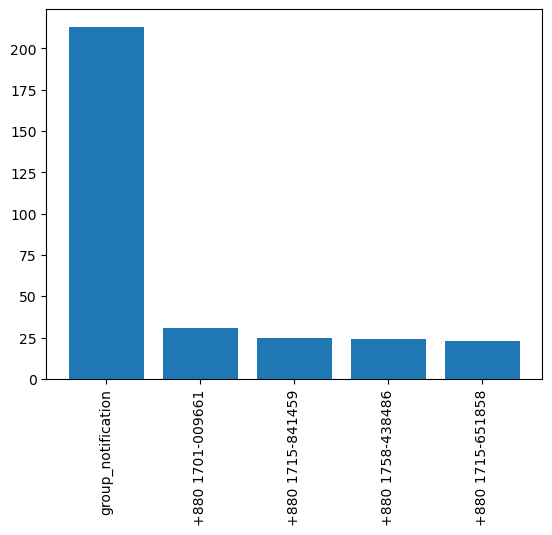

In [154]:
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [155]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,group_notification,36.22
1,+880 1701-009661,5.27
2,+880 1715-841459,4.25
3,+880 1758-438486,4.08
4,+880 1715-651858,3.91
5,+880 1708-770617,3.40
6,+880 1844-174378,3.23
7,+880 1322-379174,2.89
8,+880 1767-104949,2.89
9,+880 1743-507051,2.38


In [156]:
print(x)

group_notification    213
+880 1701-009661       31
+880 1715-841459       25
+880 1758-438486       24
+880 1715-651858       23
Name: user, dtype: int64


In [157]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media Omitted']
print(temp)

                   date              user  \
58  2024-08-20 00:04:00  +880 1797-273885   
65  2024-08-20 00:05:00  +880 1767-104949   
67  2024-08-20 00:05:00  +880 1767-104949   
68  2024-08-20 00:05:00  +880 1701-009661   
69  2024-08-20 00:05:00  +880 1797-273885   
..                  ...               ...   
583 2024-09-15 21:59:00  +880 1701-009661   
584 2024-09-15 22:04:00  +880 1687-192402   
585 2024-09-15 22:08:00  +880 1701-009661   
586 2024-09-18 13:23:00  +880 1322-379174   
587 2024-09-18 13:47:00  +880 1717-143223   

                                               message  year      month  day  \
58              Nice initiative. Thanks for adding me.  2024     August   20   
65                                                ✌️✌️  2024     August   20   
67                              Ebar adda hobe chegaye  2024     August   20   
68                                                🖐️🖐️  2024     August   20   
69                            Ovivanok chara adda?  🙄🙄  202

In [158]:
f=open('stopwords-bn.txt','r',encoding='utf-8')
bengali_stop_words=f.read().splitlines() 
print(bengali_stop_words)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [159]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [160]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
from nltk.corpus import stopwords

In [162]:
english_stop_words = stopwords.words('english')
combined_stop_words = english_stop_words + bengali_stop_words
print(combined_stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [163]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word in combined_stop_words:
            words.extend(message.split())

In [164]:
print(words)

['Nice', 'initiative.', 'Thanks', 'for', 'adding', 'me.', 'কিযে', 'বলেন', 'ভাই', 'কে', 'আমার', 'অভিভাবক', 'কে', 'আমার', 'অভিভাবক', 'অনেক', 'ভালো', 'আছি', 'ভাই।', 'প্রিয়', 'অভিভাভক', 'আমার', 'আপনি🫡🫡🫡', 'অনেক', 'ভালো', 'আছি', 'ভাই।', 'প্রিয়', 'অভিভাভক', 'আমার', 'আপনি🫡🫡🫡', 'ছোট', 'সবারই', 'অভিভাবক', '😎', 'আর', 'আমার', 'অভিভাবক', 'সজল', 'ভাইরা', '😎😎', 'ছোট', 'সবারই', 'অভিভাবক', '😎', 'আর', 'আমার', 'অভিভাবক', 'সজল', 'ভাইরা', '😎😎', 'Ekhon', 'to', 'dui', 'group', 'e', 'adda', 'hobe', 'ekta', 'amra', 'bura', 'ra', 'r', 'ekta', 'kochi', 'ra', '😬😬😬', 'ভাই', 'আপনি', 'এখনও', 'কচি', '😂', 'ভাই', 'আপনি', 'এখনও', 'কচি', '😂', 'দেখা', 'দে', 'একদিন', '@8801832394102', 'যেহেতু', 'আছে', 'চিন্তা', 'নাই', '@8801832394102', 'যেহেতু', 'আছে', 'চিন্তা', 'নাই', 'Nice', 'to', 'meet', 'with', 'you', '😉', 'Nice', 'to', 'meet', 'with', 'you', '😉', 'Nice', 'to', 'meet', 'with', 'you', '😉', 'আসসালামুআলাইকুম,', 'সবার', 'দুয়াতে', 'আগামী', 'মাসে', 'মাস্টার্সে', 'ইংল্যান্ড', 'যাচ্ছি।', 'আমাদের', 'অ্যালামনাই', 'কোন', 'ভাইয়া-

In [165]:
from collections import Counter

In [166]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,এর,285
1,ভাই,147
2,কাজ,145
3,এবং,137
4,থেকে,135
5,আমরা,133
6,এ,127
7,ফান্ড,106
8,ইতোমধ্যে,96
9,রুয়েট,96


In [167]:
!pip install emoji

In [168]:
import emoji

In [169]:
emojis=[]
for message in df['message']:
    emojis.extend(c for c in message if c in emoji.EMOJI_DATA)

In [170]:
print(emojis)

['✌', '✌', '🖐', '🖐', '🙄', '🙄', '😁', '✌', '🤐', '🤣', '🫡', '🫡', '🫡', '😎', '😎', '😎', '😬', '😬', '😬', '😂', '😃', '😃', '😃', '🥲', '🥲', '😵', '💫', '🙄', '🥲', '😉', '😂', '😂', '😂', '😂', '😘', '🥴', '😬', '😬', '🙄', '😘', '😘', '❤', '❤', '❤', '😎', '😴', '😴', '😴', '🤘', '🤐', '🤐', '🤎', '🤎', '🤎', '😌', '🤝', '❤', '🙃', '🙃', '🙃', '🤣', '🤣', '🤣', '🤣', '🤣', '😁', '🤔', '🙏', '🙏', '🙏', '🙂', '❤', '🥴', '😊', '💐', '😇', '😎', '😂', '😌', '🙃', '😬', '😬', '😬', '😬', '😬', '🙂', '🤣', '🤣', '🤣', '❤', '❤', '🙄', '🫣', '😐', '😺', '😎', '🙂', '👷', '🏽', '♂', '🤐', '🤝', '✊', '✊', '🤔', '😂', '🤣', '🙄', '🤧', '🙄', '😃', '😃', '😃', '😃', '😊', '🔺', '🔺', '🔺', '🔺', '❤', '❤', '😂', '😂', '😂']


In [171]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,10
1,😬,10
2,😂,10
3,❤,9
4,🙄,7
5,😃,7
6,😎,6
7,🤐,4
8,🙃,4
9,🔺,4


In [172]:
df['month_num']=df['date'].dt.month

In [176]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [177]:
timeline

,year,month_num,month,message
0,2024,8,August,557
1,2024,9,September,31


In [184]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [185]:
timeline['time']=time

In [186]:
timeline

,year,month_num,month,message,time
0,2024,8,August,557,August-2024
1,2024,9,September,31,September-2024


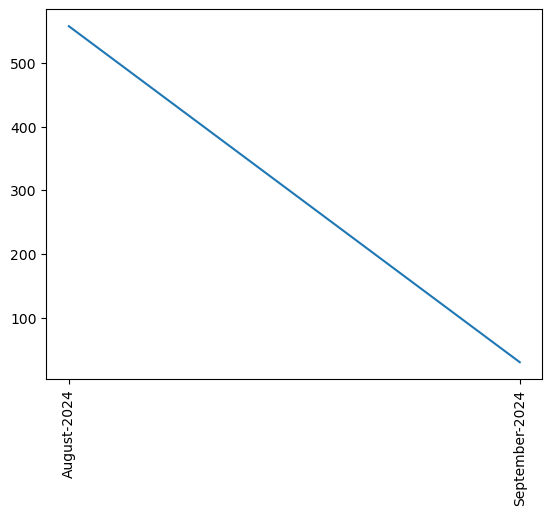

In [189]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [190]:
df['only_date']=df['date'].dt.date

In [195]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

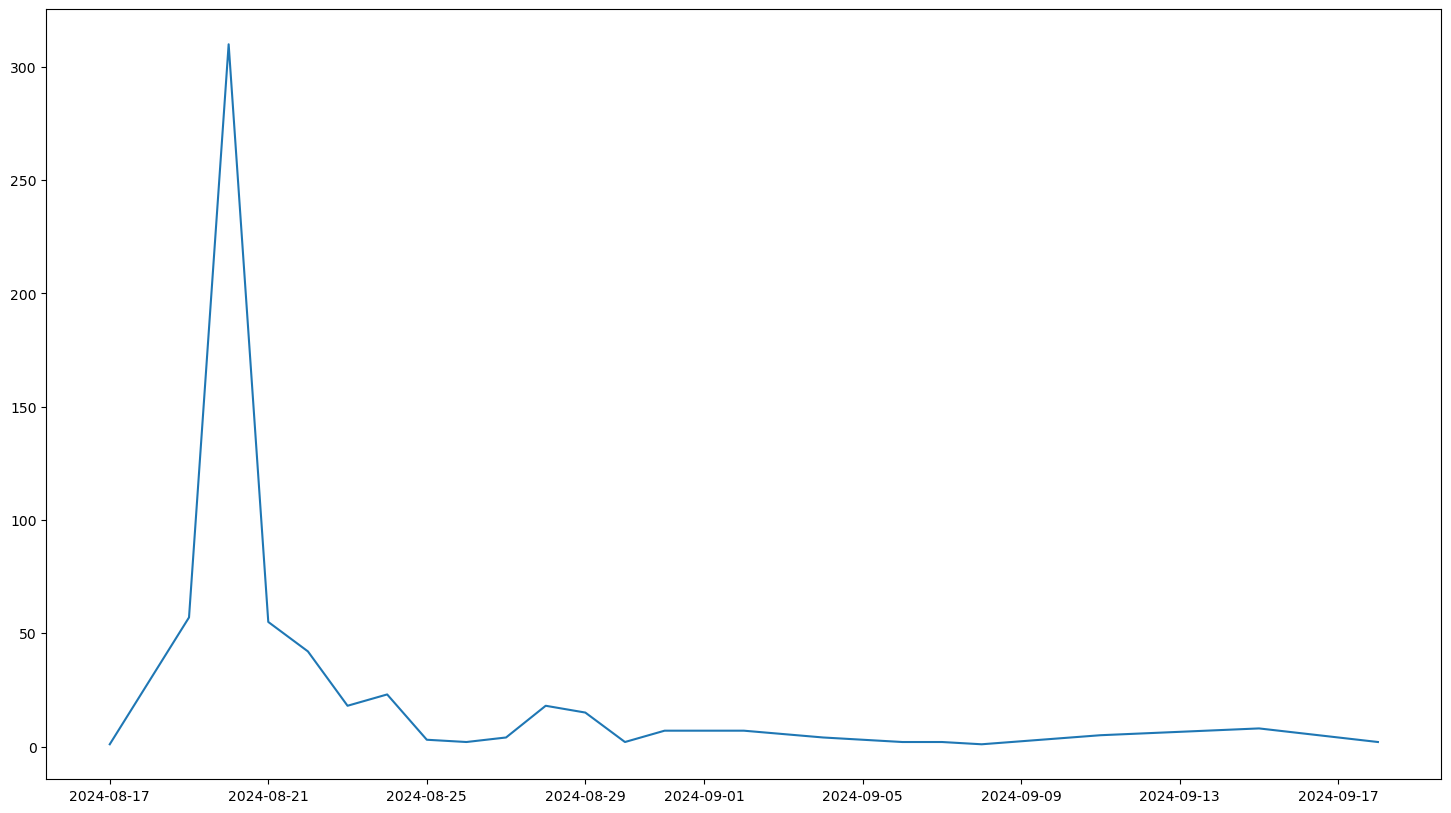

In [197]:
plt.figure(figsize=[18,10])
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [198]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,19,23,42,8,2024-08-19
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August,17,23,14,8,2024-08-17
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August,19,23,42,8,2024-08-19
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August,19,23,42,8,2024-08-19
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August,19,23,42,8,2024-08-19


In [201]:
df['day_name']= df['date'].dt.day_name()

In [202]:
df['day_name'].value_counts()

Tuesday      314
Wednesday     84
Monday        66
Thursday      57
Saturday      33
Friday        22
Sunday        12
Name: day_name, dtype: int64

In [203]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2024-08-19 23:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2024,August,19,23,42,8,2024-08-19,Monday
1,2024-08-17 23:14:00,group_notification,"~ Nafis Al Imran created group ""RCA(Rajshahi ...",2024,August,17,23,14,8,2024-08-17,Saturday
2,2024-08-19 23:42:00,group_notification,You joined using this group's invite link,2024,August,19,23,42,8,2024-08-19,Monday
3,2024-08-19 23:42:00,group_notification,Yusuf joined using this group's invite link,2024,August,19,23,42,8,2024-08-19,Monday
4,2024-08-19 23:42:00,group_notification,+880 1521-751439 joined using this group's inv...,2024,August,19,23,42,8,2024-08-19,Monday


In [204]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+"-"+str('00'))
    elif hour==0:
        period.append(str(00)+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))
    

In [206]:
df['period']=period

In [207]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
566,2024-09-04 10:57:00,+880 1717-905311,Ok,2024,September,4,10,57,9,2024-09-04,Wednesday,10-11
480,2024-08-23 23:02:00,+880 1758-438486,RCA এর ফান্ডের প্রতিদিন এর জমার হিসাব আমি রাতে...,2024,August,23,23,2,8,2024-08-23,Friday,23-00
517,2024-08-28 23:03:00,group_notification,~ miratsafinturjo added +880 1717-853035,2024,August,28,23,3,8,2024-08-28,Wednesday,23-00
406,2024-08-21 17:35:00,+880 1737-157337,@8801322379174 @8801627991923,2024,August,21,17,35,8,2024-08-21,Wednesday,17-18
25,2024-08-19 23:46:00,group_notification,+880 1746-236876 joined using this group's inv...,2024,August,19,23,46,8,2024-08-19,Monday,23-00


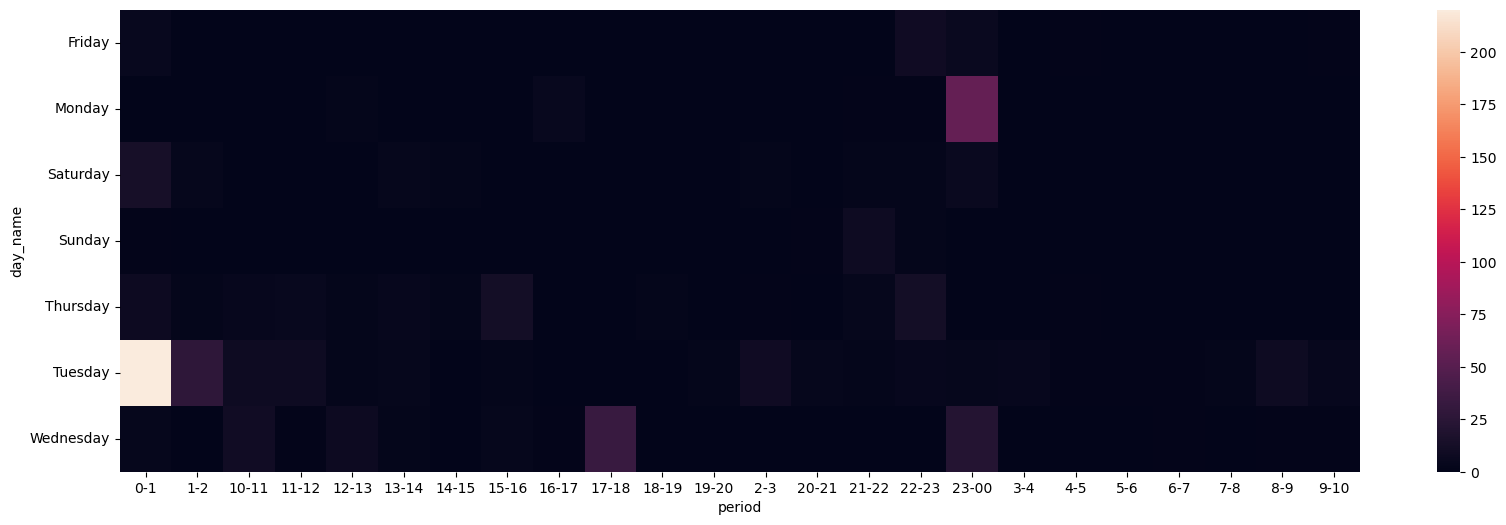

In [210]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()